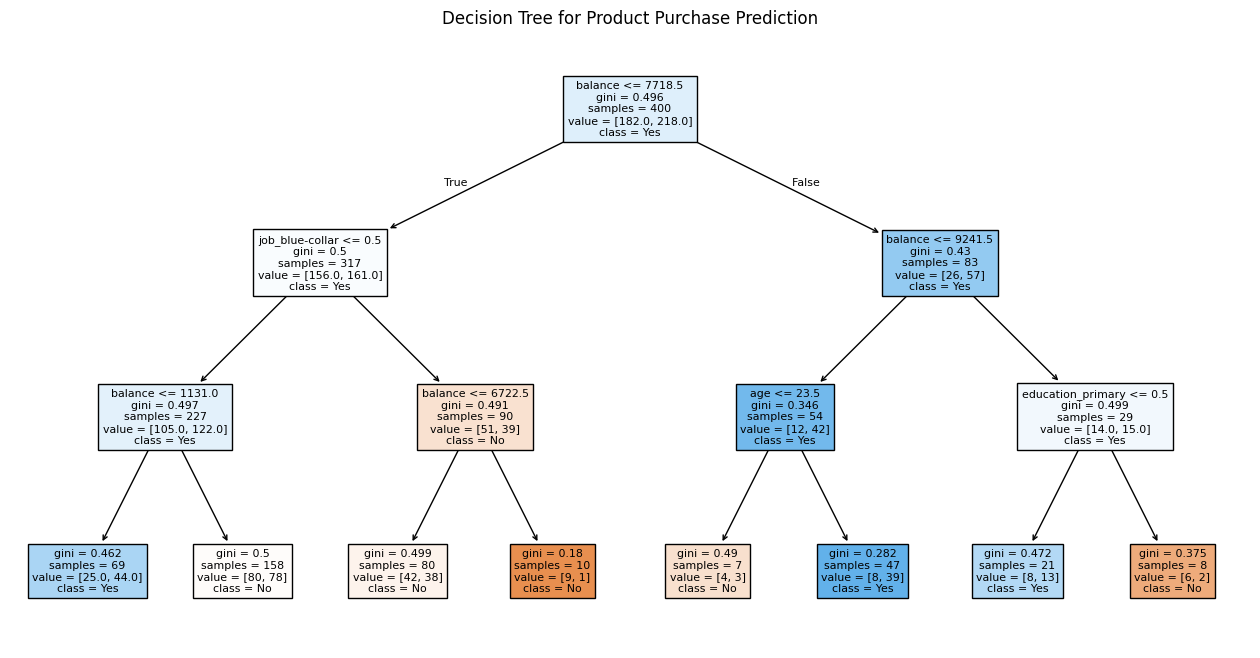

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.76      0.67        54
           1       0.58      0.39      0.47        46

    accuracy                           0.59       100
   macro avg       0.59      0.58      0.57       100
weighted avg       0.59      0.59      0.58       100



In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate synthetic bank data
bank_data = pd.DataFrame({
    'age': np.random.randint(18, 70, 500),
    'job': np.random.choice(['admin.', 'technician', 'blue-collar', 'retired'], size=500),
    'marital': np.random.choice(['married', 'single', 'divorced'], size=500),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], size=500),
    'balance': np.random.randint(-2000, 10000, 500),
    'purchase': np.random.choice([0, 1], size=500)
})

# One-hot encode categorical variables
bank_data_encoded = pd.get_dummies(bank_data.drop('purchase', axis=1))
X = bank_data_encoded
y = bank_data['purchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Product Purchase Prediction')
plt.show()

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
